In [90]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
#njobs = 4

In [91]:
# Get data
train = pd.read_csv("train.csv")
print("train : " + str(train.shape))

train : (1460, 81)


In [92]:
# Check for duplicates   
if len(train.TrainId) == len(set(train.TrainId)):
    print "no duplicates"
else:
    print "duplicates"
train = train.drop("TrainId", axis = 1)

no duplicates


In [93]:
train = train.ix[~((train.GrLivArea>4000) & (train.SalePrice<300000))]

/Users/mohitsharma/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [94]:
train_labels = train.SalePrice
train_features = train.drop(['SalePrice'],axis=1)

In [95]:
conv_MSZoning = []
for x in train_features["MSZoning"]:
    if 'A' in x:
        conv_MSZoning.append(1)
    elif 'C' in x:
        conv_MSZoning.append(2)
    elif 'FV' in x:
        conv_MSZoning.append(3)
    elif 'I' in x:
        conv_MSZoning.append(4)
    elif 'RH' in x:
        conv_MSZoning.append(5)
    elif 'RL' in x:
        conv_MSZoning.append(6)
    elif 'RP' in x:
        conv_MSZoning.append(7)
    elif 'RM' in x:
        conv_MSZoning.append(8)
    else:
        conv_MSZoning.append(0)
#print(conv_MSZoning)    
train_features["MSZoning"] = conv_MSZoning
#print(data)

In [96]:
conv_LotFrontage = []
for x in train_features["LotFrontage"]:
    if np.isnan(x):
        conv_LotFrontage.append(0)
    else:
        conv_LotFrontage.append(x)
#print(conv_LotFrontage)    
train_features["LotFrontage"] = conv_LotFrontage        

In [97]:
train_features = train_features[['GrLivArea','MSSubClass','OverallQual','OverallCond','MSZoning','LotFrontage','LotArea']]
train_features.columns.size

7

In [98]:
# Get data
test = pd.read_csv("test.csv")
print("test : " + str(test.shape))

test : (1459, 80)


In [99]:
# Check for duplicates   
if len(test.Id) == len(set(test.Id)):
    print "no duplicates"
else:
    print "duplicates"
test = test.drop("Id", axis = 1)

no duplicates


In [100]:
conv_MSZoning = []
for y in test.MSZoning: 
    if type(y) is str and 'A' in y:
        conv_MSZoning.append(1)
    elif type(y) is str and 'C' in y:
        conv_MSZoning.append(2)
    elif type(y) is str and 'FV' in y:
        conv_MSZoning.append(3)
    elif type(y) is str and 'I' in y:
        conv_MSZoning.append(4)
    elif type(y) is str and 'RH' in y:
        conv_MSZoning.append(5)
    elif type(y) is str and 'RL' in y:
        conv_MSZoning.append(6)
    elif type(y) is str and 'RP' in y:
        conv_MSZoning.append(7)
    elif type(y) is str and 'RM' in y:
        conv_MSZoning.append(8)
    else:
        conv_MSZoning.append(0)
print(len(conv_MSZoning))    
print(len(test["MSZoning"]) )  
test.MSZoning = conv_MSZoning

1459
1459


In [101]:
conv_LotFrontage = []
for x in test["LotFrontage"]:
    if np.isnan(x):
        conv_LotFrontage.append(0)
    else:
        conv_LotFrontage.append(x)
#print(conv_LotFrontage)    
test["LotFrontage"] = conv_LotFrontage        

In [102]:
test_features = test[['GrLivArea','MSSubClass','OverallQual','OverallCond','MSZoning','LotFrontage','LotArea']]
test_features.columns.size

7

In [103]:
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)

(1458, 7)
(1458,)
(1459, 7)


In [104]:
# Linear Regression
lr = LinearRegression()
lr.fit(train_features, train_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
train_labels_pred = lr.predict(train_features)
test_labels_pred = lr.predict(test_features)
print(train_labels_pred.shape)
print(test_labels_pred.shape)

(1458,)
(1459,)


In [106]:
print(train_labels.values)
print(train_labels_pred)

[208500 181500 223500 ..., 266500 142125 147500]
[ 219982.27538834  172279.63113794  227160.49730067 ...,  258184.61525833
  128047.24789734  139317.30881096]


In [107]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, train_features, train_labels, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, test_features, test_labels_pred, scoring = scorer, cv = 10))
    return(rmse)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())

('RMSE on Training set :', 37954.228892649095)
('RMSE on Test set :', 4.6291611439164643e-09)


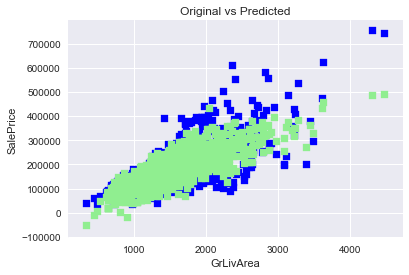

In [108]:
# Plot predictions
plt.scatter(train_features.GrLivArea, train_labels, c = "blue", marker = "s", label = "Training data")
plt.scatter(train_features.GrLivArea, train_labels_pred, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Original vs Predicted")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()